In [1]:
import pyscf
from pyscf.tools import cubegen
import matplotlib.pyplot as plt
import numpy as np

mol = pyscf.gto.M(
    atom="H 0. 0. 0.; H 0. 0. 3.0", 
    basis='ccpvtz',
    unit='B'
    )

mf = pyscf.scf.RHF(mol)
mf.kernel()

converged SCF energy = -0.988591417686438


-0.9885914176864381

In [2]:
mf.mo_occ

array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
mf.mo_energy

array([-0.42940989,  0.01743104,  0.3733929 ,  0.4360283 ,  0.67149438,
        0.67149438,  0.78149882,  0.91815212,  0.91815212,  1.29691171,
        2.48418587,  2.65719198,  3.14753717,  3.19623173,  3.19623173,
        3.39811948,  3.39811948,  3.48387271,  3.48387271,  3.70956898,
        3.70956898,  3.85430582,  3.85430582,  3.92516651,  4.02049466,
        4.02049466,  4.15975046,  4.87306568])

In [4]:
def plot_density(density):
    plt.figure(figsize=(8,8))
    range = np.max(np.abs(density))
    cm = plt.imshow(density[density.shape[0]//2,:,:], cmap='bwr',vmin=-range, vmax=range)
    plt.colorbar()


def plot_density_line(density):
    plt.figure(figsize=(8,8))
    cm = plt.plot(np.arange(density.shape[2]), density[density.shape[0]//2,density.shape[1]//2,:])
    

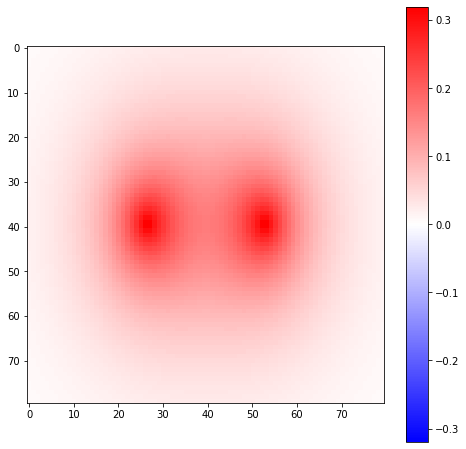

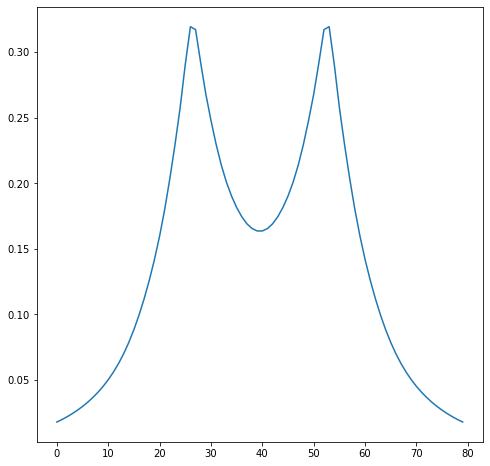

In [5]:
density = cubegen.orbital(mol, 'mo1.cube', mf.mo_coeff[:,0])
plot_density(density)
plot_density_line(density)

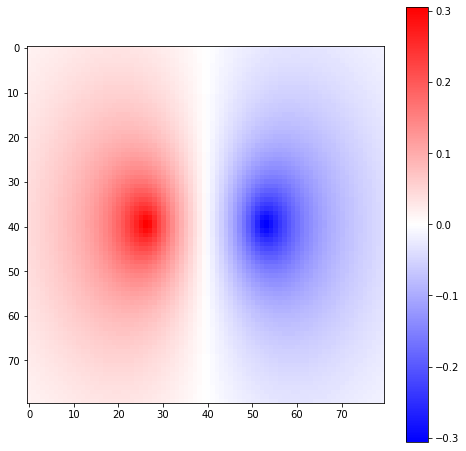

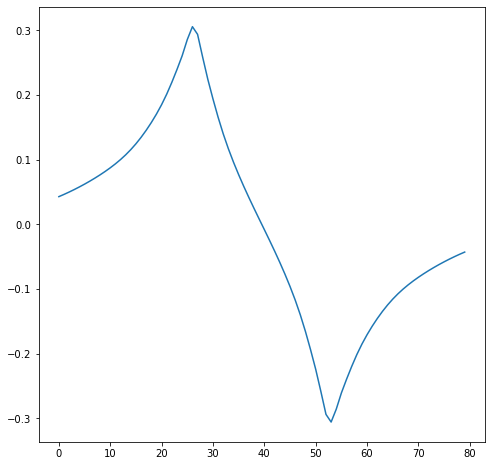

In [6]:
orbital = cubegen.orbital(mol, 'mo1.cube', mf.mo_coeff[:,1])
plot_density(orbital)
plot_density_line(orbital)

$$
H_{eff} = |\Phi_0\rangle \epsilon_0 \langle \Phi_0| + |\Phi_1\rangle \epsilon_1 \langle \Phi_1|
$$

This is equivalent to 
$$
H_{eff} = \begin{matrix}
\epsilon_0 & 0 \\
0 & \epsilon_1 \\
\end{matrix} 
$$

Written in the molecular orbital basis.

We eventually would like to write our effective Hamiltonian in a localized basis, which would correspond to 'sites.'

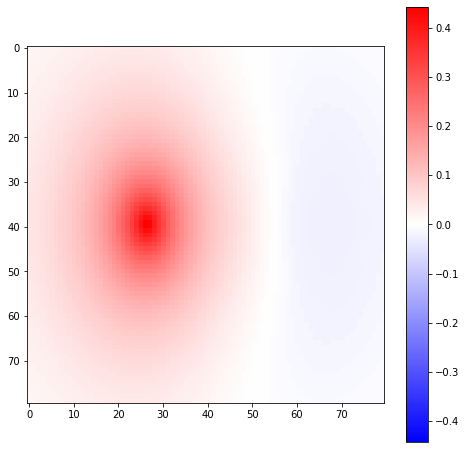

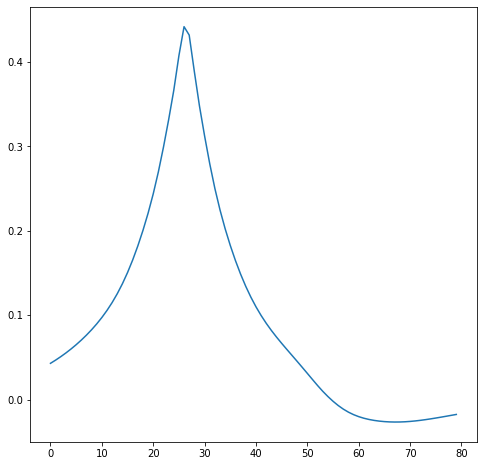

In [7]:
density = cubegen.orbital(mol, 'mo1.cube', (mf.mo_coeff[:,0]+mf.mo_coeff[:,1])/np.sqrt(2))
plot_density(density)
plot_density_line(density)

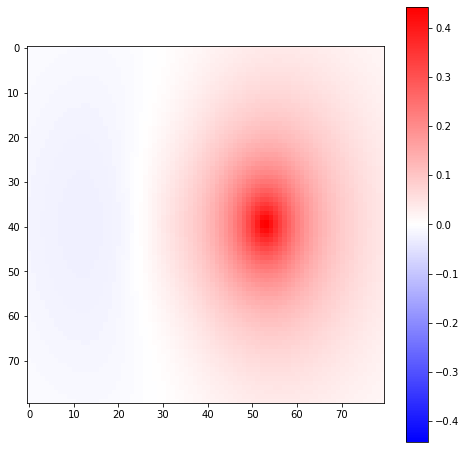

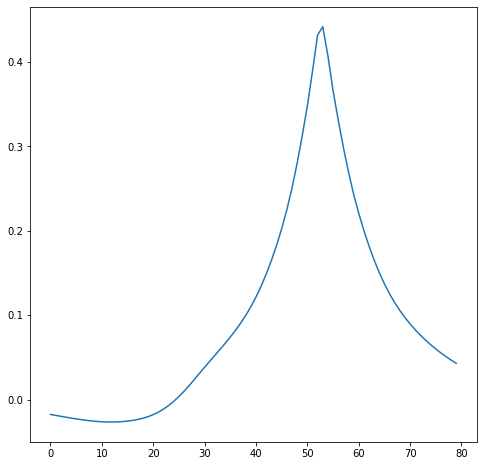

In [8]:
density = cubegen.orbital(mol, 'mo1.cube', (mf.mo_coeff[:,0]-mf.mo_coeff[:,1])/np.sqrt(2))
plot_density(density)
plot_density_line(density)

Now we have basis functions that at least approximately correspond to sites. 

Question: what is the Hamiltonian in the new basis? Rotation operator is:
$$
U = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix} 
$$

$H$ in the new basis is 
$$
UHU^\dagger = \frac{1}{2} \begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix} 
\begin{bmatrix}
\epsilon_0 & 0 \\
0 & \epsilon_1 \\
\end{bmatrix} 
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix} 
$$


In [10]:
R = np.array([[1,1],[1,-1]])/np.sqrt(2)
H = np.array([[mf.mo_energy[0],0],[0,mf.mo_energy[1]]])
H_tb = np.einsum("ij,jk,kl->il", R,H,R)
print(H_tb)

[[-0.20598943 -0.22342047]
 [-0.22342047 -0.20598943]]


In [33]:
w,v = np.linalg.eigh(H_tb)
print(w)
print(v)

[-0.40621319 -0.0148791 ]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
